## Seattle VS NYC Weather Analysis

#Problem
The objective of this notebook is to utilize data of rainfall from NYC and Seattle to determine which city receives more rainfall. We will be using data from January 1, 2020 to January 1, 2024 to come to our conclusion.

Our data is retrieved from the [NOAA website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND)
The initial datasets are called `seattle_rain.csv` and `ny_rain.csv`.
The datasets was cleaned in `Dataset_cleaning.ipynb`and was extracted into a csv called `clean_weather_data.csv`.
All notebooks and datasets can be found in my [github repository](https://github.com/MCaiGH/Seattle-Weather).

## Import Packages

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load Data

In [27]:
df_weather = pd.read_csv('https://raw.githubusercontent.com/MCaiGH/Seattle-Weather/main/clean_weather_data.csv')

Dates are automatically read as object, convert to datetime format for analysis

In [37]:
df_weather["Date"] = pd.to_datetime(df_weather["Date"])
#separate month and year
df_weather['Month'] = pd.DatetimeIndex(df_weather['Date']).month
df_weather["Year"] = df_weather["Date"].dt.year

## Line Plot
Create a line plot that shows daily precipitation of both cities

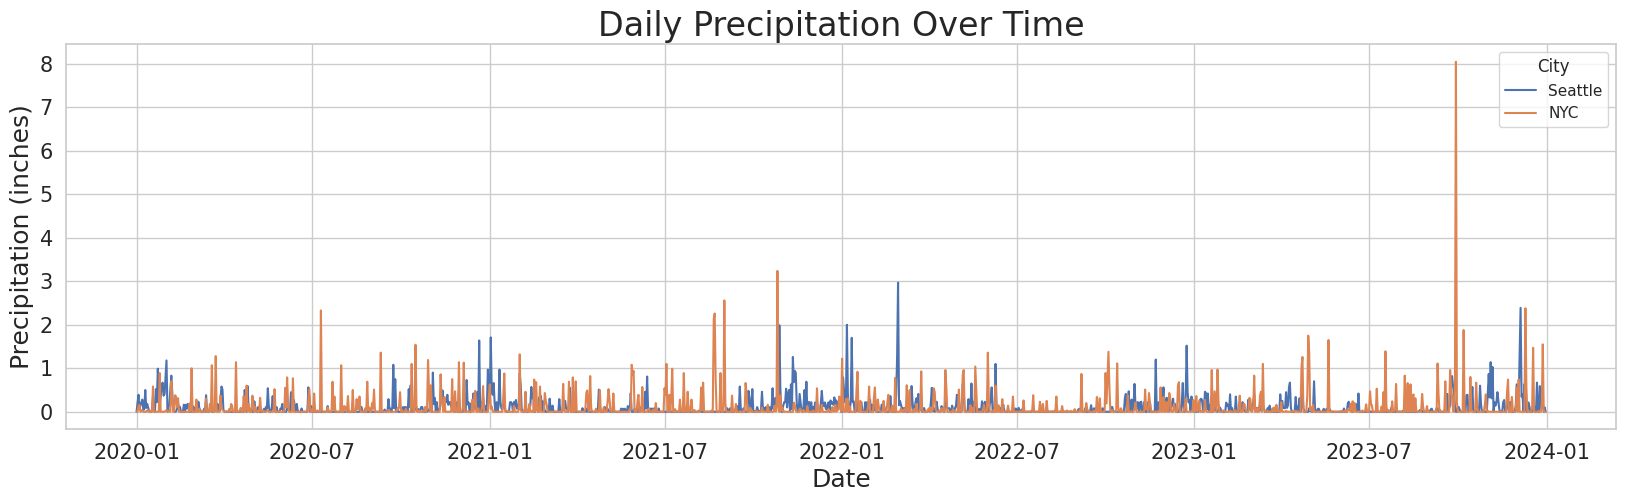

In [38]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df_weather, x='Date', y='Precipitation', hue='City')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Daily Precipitation Over Time', fontsize=24)

plt.tick_params(labelsize=15);

#Monthly Precipitation Line Plot
Show average monthly precipitation across all four years with shaded variances

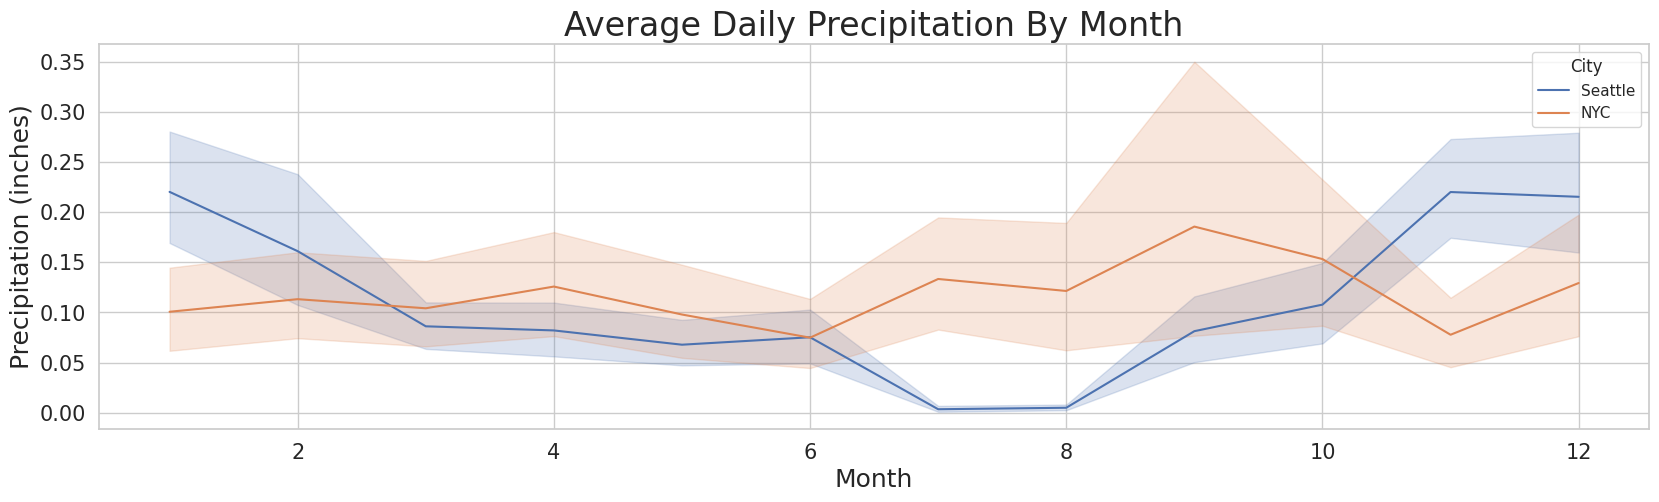

In [74]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_weather, x='Month', y='Precipitation', hue='City', errorbar="ci")
plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Average Daily Precipitation By Month', fontsize=24)
plt.tick_params(labelsize=15);

#Monthly Precipitation Line Plot by Year
Show the average monthly precipitation for each city separated by year.

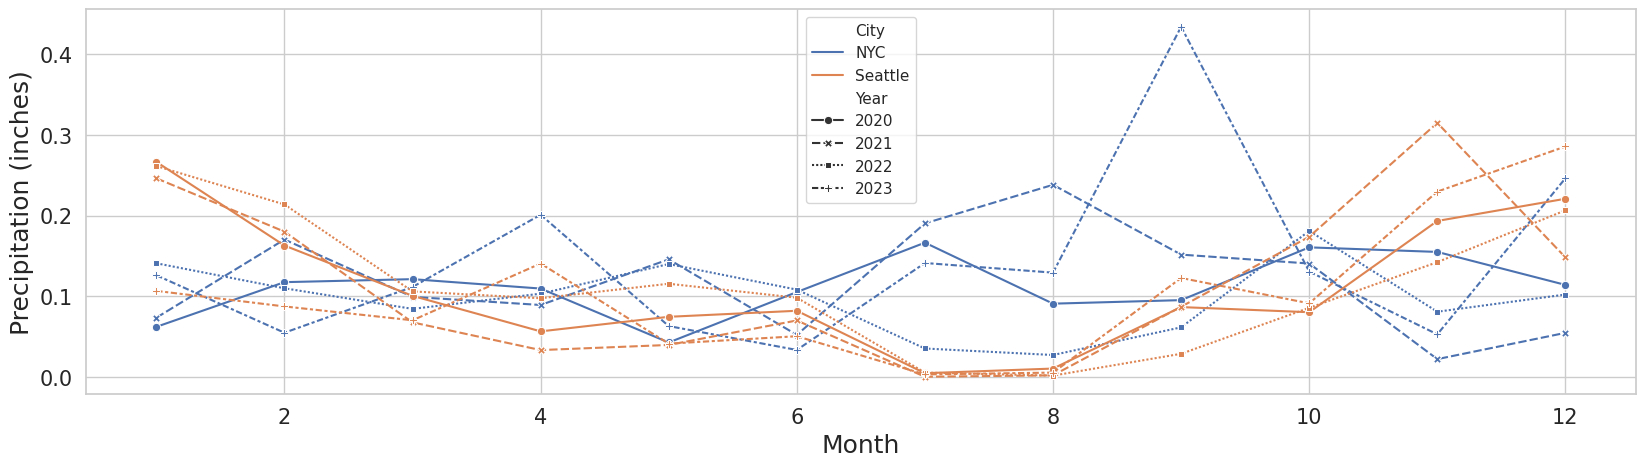

In [82]:
plt.figure(figsize=(20,5))
average_precipitation = df_weather.groupby(['Month', 'Year', 'City'])['Precipitation'].mean().reset_index()
sns.lineplot(data=average_precipitation, x='Month', y='Precipitation', hue='City', style='Year', markers=True)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15)

This is a bit messy so it isn't included in the final doccument as it can be confusing to a general audience.

#Bar plot for average precipitation on any given day for each city

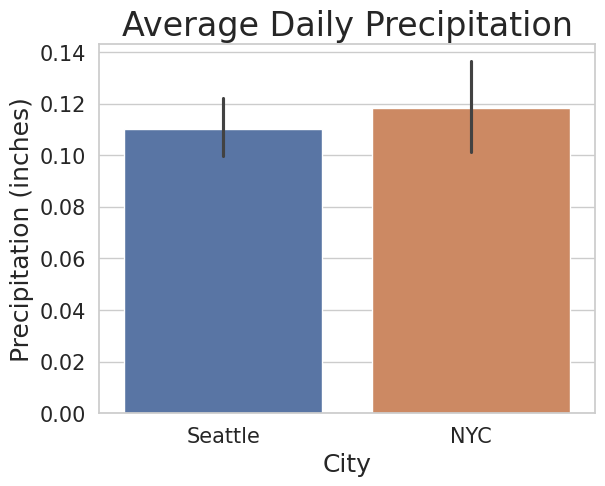

In [76]:
sns.barplot(data=df_weather, x='City', y='Precipitation', hue='City')
plt.xlabel('City', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Average Daily Precipitation', fontsize=24)
plt.tick_params(labelsize=15);

#Bar Plot that shows the number of days that a city did not experience rain each year.

Minor Data transformation

In [80]:
#create a dataframe of all observations with non zero precipitation values
non_zero_precipitation = df_weather[df_weather['Precipitation'] != 0]
count_non_zero_days = non_zero_precipitation.groupby(['Year', 'City']).size().reset_index(name='Number of Days')

Plot

Text(0, 0.5, 'Number of Days')

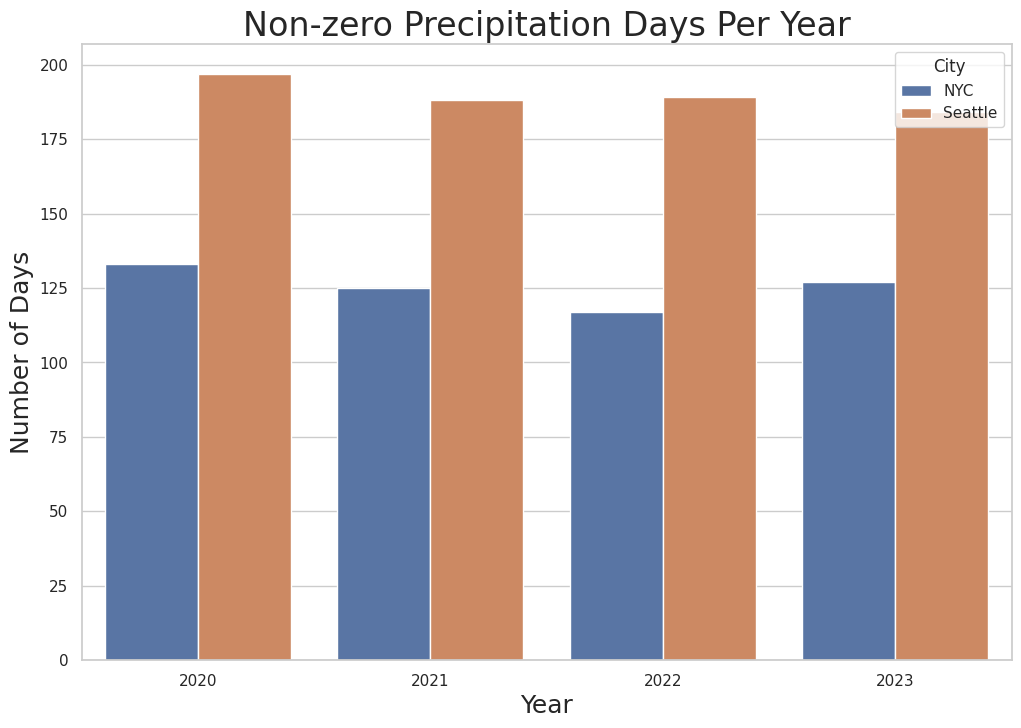

In [83]:
plt.figure(figsize=(12, 8))
sns.barplot(data=count_non_zero_days, x='Year', y='Number of Days', hue='City')
plt.title('Non-zero Precipitation Days Per Year', fontsize = 24)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of Days', fontsize = 18)